### Overview

In this article we will be working to develop an application that will help in live `image segmentation` on an image. It is very easy to use this application, on the first window with mouse drag we will select a part of picture and then on the other window we will be able to see that part of the image only i.e. image segmentation.

### Application of image segmentation

1. Machine Vision: It is the technology which is based on the image-based inspection and analysis which can be achieved by segmenting different individual.


2. Traffic control system: This can be helpful when the traffic police can segment the different vehicles.


3. Video surveillance: For security purpose also we can use the application of image segmentation.

### Importing library

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Let's look at the image

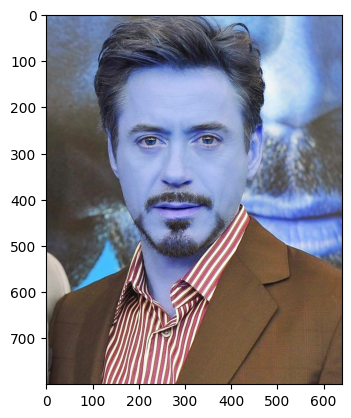

In [2]:
pic = cv2.imread('robert.jpg')
plt.imshow(pic)

### Function to draw the real time bounding box on image

Basically, the following function will draw the bounding box in real-time on the image. First, let's check what kind of parameters it has.
* click: This parameter will hold which kind of button will be clicked.
* x: This parameter will hold the X value of the cursor.
* y: This parameter will hold the Y value of the cursor.
* Then there are some default parameters.

In [3]:
def draw_bounding_box(click, x, y, flag_param, parameters):
    global x_pt, y_pt, drawing, top_left_point, bottom_right_point, original_image  
    
    if click == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        x_pt, y_pt = x, y   

    elif click == cv2.EVENT_MOUSEMOVE:
        if drawing:
            top_left_point, bottom_right_point = (x_pt,y_pt), (x,y)
            image[y_pt:y, x_pt:x] = 255 - original_image[y_pt:y, x_pt:x]
            cv2.rectangle(image, top_left_point, bottom_right_point, (0,255,0), 2)

    elif click == cv2.EVENT_LBUTTONUP:
        drawing = False
        top_left_point, bottom_right_point = (x_pt,y_pt), (x,y)
        image[y_pt:y, x_pt:x] = 255 - image[y_pt:y, x_pt:x]
        cv2.rectangle(image, top_left_point, bottom_right_point, (0,255,0), 2)
        bounding_box = (x_pt, y_pt, x-x_pt, y-y_pt)
        
        grabcut_algorithm(original_image, bounding_box)

Code-breakdown:

1. Before writing the main code we will be declaring some global variables which one can see in the code.


2. Then with the help of the IF condition we will be detecting whether the left button is clicked or not and if it encounters the same event it will parse the True value to the flag variable and initialize the global x and y variables with the parameter values.


3. As we know, while making the bounding box we need to drag the mouse as well to cover the distance between the source and the destination for that reason we will be detecting the movement of the mouse. Hence, we will be initializing the top-left and bottom-right points (source and destination) and then we will use the `cv2.rectangle` function to draw the bounding box.


4. So, we have implemented the button down and button movement functionality now we need to complete the functionality of the button-down as well. First of all the flag variable should be re-initialized to False because now there would be no need to draw the rectangle but the other variables will still hold the values (updated one) and after that, we will make the rectangle.


5. At the last we will call the `Grab algorithm` function - which we will discuss later.

### Grabcut Algorithm

What is Grabcut algorithm in OpenCV?

Few things may get clear with the name itself i.e. The user will be grabbing the particular part of the image and cut it down by making the boudning box around that part but this is not the only thing that Grabcut algorithm performs but there is also some technicalities behind this, This algorithm keeps the note of color attribution of that object by using the `Gaussian model`.


This function will take only 2 parameters:

* original_image: The image on which we want to imply the image segmentation.
* bounding_box: This is the same variable that we had at the end of `draw_bounding_box` function which was holding the values of top-left and bottom-right.

In [4]:
def grabcut_algorithm(original_image, bounding_box):
    
    segment = np.zeros(original_image.shape[:2],np.uint8)
    
    x,y,width,height = bounding_box
    segment[y:y+height, x:x+width] = 1

    background_mdl = np.zeros((1,65), np.float64)
    foreground_mdl = np.zeros((1,65), np.float64)
    
    cv2.grabCut(original_image, segment, bounding_box, background_mdl, foreground_mdl, 5,
    cv2.GC_INIT_WITH_RECT)
    
    new_mask = np.where((segment==2)|(segment==0),0,1).astype('uint8')
    
    original_image = original_image*new_mask[:,:,np.newaxis]
    
    cv2.imshow('Result', original_image)

Code-breakdown:

1. The very first step will be to give some valid values to segmentation variable i.e. providing the atributes of image.


2. Now. we will extract the values that will be needed while making the bounding box and when we will be having those values then it can be easily pass on to cut the ROI.


3. Then we are declaring two more variables (background model and foregraound model) that will be responsible for the look of the masked part when the rectangle will be created.


4. Finally we will be using the Grabcut function using `cv.grabCut` to perform our main work and it will take all the valid paramters like the main image, segmented variable, both foreground and background model and `GC_INIT_WITH_RECT` this is very important to notice as this means we are going with the rectangle segmentation and not the masking segmentation.


5. Now we will pluck out the new mask and store it in the variable and then will apply the above mask to the original image only.


6. At the last we will display the image when the function is called.

In [7]:
if __name__=='__main__':
    drawing = False
    top_left_point, bottom_right_point = (-1,-1), (-1,-1)

    original_image = cv2.imread("robert.jpg")
    original_image = cv2.resize( original_image ,(500,500))
    image = original_image.copy()
    cv2.namedWindow('Frame')
    cv2.setMouseCallback('Frame', draw_bounding_box)
    
    while True:
        cv2.imshow('Frame', image)
        c = cv2.waitKey(1)
        if c == 27:
            break
            
    cv2.destroyAllWindows()

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\matrix.cpp:809: error: (-215:Assertion failed) 0 <= roi.x && 0 <= roi.width && roi.x + roi.width <= m.cols && 0 <= roi.y && 0 <= roi.height && roi.y + roi.height <= m.rows in function 'cv::Mat::Mat'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\matrix.cpp:809: error: (-215:Assertion failed) 0 <= roi.x && 0 <= roi.width && roi.x + roi.width <= m.cols && 0 <= roi.y && 0 <= roi.height && roi.y + roi.height <= m.rows in function 'cv::Mat::Mat'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\matrix.cpp:809: error: (-215:Assertion failed) 0 <= roi.x && 0 <= roi.width && roi.x + roi.width <= m.cols && 0 <= roi.y && 0 <= roi.height && roi.y + roi.height <= m.rows in function 'cv::Mat::Mat'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\matrix.cpp:809: error: (-215:Assertion failed) 0 <= roi.x && 0 <= roi.width && roi.x + roi.width <= m.cols && 0 <= roi.y && 0 <= roi.height && roi.y + roi.height <= m.rows in function 'cv::Mat::Mat'


Code-breakdown:

This is the part of the code that will be executed first (__name__ == '__main__')

1. First we will initialize the flag variable to False just so that there is no garbage value in it and same for the top left and bottom right variable.


2. Then we will read the image (`cv2.imread()`) on which we will apply all the segmentation techniques and resize the image using `cv2.resize()` function.


3. For naming the window we have used `cv2.namedWindow()` function.


4. Then for calling the `draw_bounding_box` function we will use the Callback function it will help to call the function only when the button is clicked.


5. Then inside the infinte loop we will see the application along with that we are also giving the exit point i.e. window will be destroyed when `esc` key is pressed and application will be closed.

### Conclusion

So in this article we were able to build a application which can segment the image in the real time but we have done it purely with OpenCV the reason I'm saying only opencv is that there are other framework in the community like `Yolo` and `Mediapipe` which can also help in building the image segmentation application. We can also test our application from other images as well we have to just change the path of the image in `__main__` function's variable - **original_image** and that's it we are ready to test on other image.